# 합성곱 신경망 다중 클래스 분류 연습문제
- 카테고리 최소 3개 이상 선택해서 
- 다중 클래스 분류 모델 생성
- 가위바위보 + 음식분류 예제 참고 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from PIL import Image # 이미지 파일을 연결하고 변환가능한 객체 생성해주는 라이브러리
import os, glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

# 데이터 준비
 

In [21]:
# 분류 데이터 로딩을 위해 카테고리 지정
# 데이터 저장된 기본 폴더 설정
root_dir = './Food Classification dataset/'

# 카테고리 6개
categories = ['pizza', 'Sandwich', 'sushi','Taco', 'omelette', 'Fries']

nb_classes = len(categories)

In [22]:
# 데이터 셋 나누기
import splitfolders


In [28]:
# 현재 root_dir 폴더만 있는 상태에서
# train/va/test 분리

test_val_dir = './food_ds'

splitfolders.ratio(root_dir, output=test_val_dir, seed=1337, ratio=(.8, .1, .1))

# 확인
# food_ds 폴더에 test/train/val 로 데이터가 나뉘어 들어감

Copying files: 23873 files [00:16, 1492.06 files/s]


## 이미지 전처리 

In [36]:
TRAIN_DIR = './food_ds/train'
VALIDATION_DIR = './food_ds/val'
TEST_DIR = './food_ds/test'

In [37]:
# 이미지 전처리
X = []
Y = []

# 이미지 크기 지정
image_width = 64
image_height = 64

for idx, category in enumerate(categories):
    image_dir = TRAIN_DIR + '/' + category
    files = glob.glob(image_dir + '/' +'*.jpg' )
    print(image_dir + '/' +'*.jpg')
    
    # 이미지 전처리
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_width, image_height))
        data = np.asarray(img)
        X.append(data)
        Y.append(idx)

./food_ds/train/pizza/*.jpg
./food_ds/train/Sandwich/*.jpg
./food_ds/train/sushi/*.jpg
./food_ds/train/Taco/*.jpg
./food_ds/train/omelette/*.jpg
./food_ds/train/Fries/*.jpg


## 합성곱 신경망 모델 생성 

In [38]:
# 이미지 형태를 array로 변환
X = np.array(X)
Y = np.array(Y)

In [39]:
# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=100)

In [40]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(1365, 64, 64, 3)

(455, 64, 64, 3)

(1365,)

(455,)

In [41]:
# 데이터 변환
from keras.utils import to_categorical
    
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [42]:
y_test.shape

(455, 5)

In [45]:
# (1) 모델 설정 
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # 25%의 필터를 끔
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax')) # 다중 클래스 분류

# (2) 컴파일
model.compile(loss='categorical_crossentropy',  # 다중 클래스 분류
                optimizer='rmsprop', 
                metrics=['accuracy'])

In [17]:
# model.summary()

In [46]:
model.fit(X_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
43/43 [==============================] - 8s 169ms/step - loss: 1.1786 - accuracy: 0.5201
Epoch 2/30
43/43 [==============================] - 8s 178ms/step - loss: 0.8985 - accuracy: 0.6059
Epoch 3/30
43/43 [==============================] - 7s 167ms/step - loss: 0.7894 - accuracy: 0.6718
Epoch 4/30
43/43 [==============================] - 7s 153ms/step - loss: 0.7522 - accuracy: 0.7106
Epoch 5/30
43/43 [==============================] - 7s 168ms/step - loss: 0.6571 - accuracy: 0.7341
Epoch 6/30
43/43 [==============================] - 7s 167ms/step - loss: 0.6144 - accuracy: 0.7582
Epoch 7/30
43/43 [==============================] - 8s 176ms/step - loss: 0.5553 - accuracy: 0.7780
Epoch 8/30
43/43 [==============================] - 7s 160ms/step - loss: 0.5637 - accuracy: 0.7707
Epoch 9/30
43/43 [==============================] - 8s 177ms/step - loss: 0.4623 - accuracy: 0.8212
Epoch 10/30
43/43 [==============================] - 7s 169ms/step - loss: 0.4347 - accuracy: 0.8330

In [ ]:
# 왜 6개로 분류했는데 마지막 층이 5가 아니면 오류가 나지?

In [48]:
loss, acc = model.evaluate(X_test, y_test)
loss
acc

15/15 [==============================] - 1s 46ms/step - loss: 1.7065 - accuracy: 0.7341


1.7064584493637085

0.7340659499168396

## 테스트 이미지로 예측 결과 확인 

In [59]:
test_samples = glob.glob('./image/food_test_*_'+'*.jpg')
test_samples

['./image/food_test_omelette_5.jpg',
 './image/food_test_sushi_2.jpg',
 './image/food_test_tacos_4.jpg',
 './image/food_test_sandwich_3.jpg',
 './image/food_test_pizza_1.jpg']

In [60]:
# 테스트 샘플 이미지 전처리

image_size = 64

X = []
test_files = []

# 이미지 전처리
for fname in test_samples:
    img = Image.open(fname)
    img = img.convert("RGB")
    img = img.resize((image_size, image_size))
    data = np.asarray(img) # array로 변환
    data = data.astype('float32') / 255
    X.append(data)
    test_files.append(fname)

X = np.array(X)

In [61]:
# 예측 실행
pred_prob = model.predict(X)

1/1 [==============================] - 0s 30ms/step


In [55]:
# 이미지 확인
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

# plt.imshow(mpimg.imread(test_samples[1]))
# plt.show()
# 잘 나옴

In [63]:
test_samples[1]
test_samples[1].split('/')[2].split('_')[2]

'./image/food_test_sushi_2.jpg'

'sushi'

<Figure size 400x300 with 0 Axes>

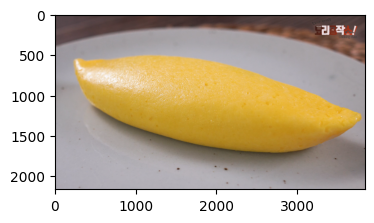

테스트 파일 :  ./image/food_test_omelette_5.jpg
실제 :  omelette
예측 :  omelette


<Figure size 400x300 with 0 Axes>

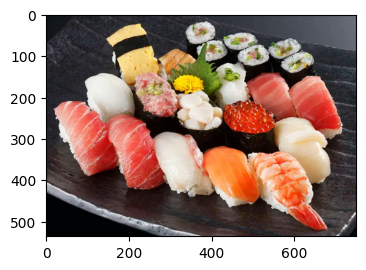

테스트 파일 :  ./image/food_test_sushi_2.jpg
실제 :  sushi
예측 :  sushi


<Figure size 400x300 with 0 Axes>

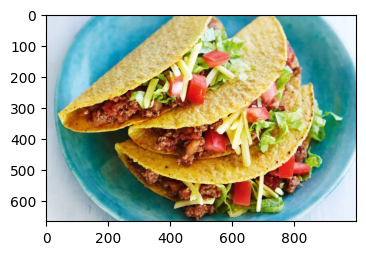

테스트 파일 :  ./image/food_test_tacos_4.jpg
실제 :  tacos
예측 :  pizza


<Figure size 400x300 with 0 Axes>

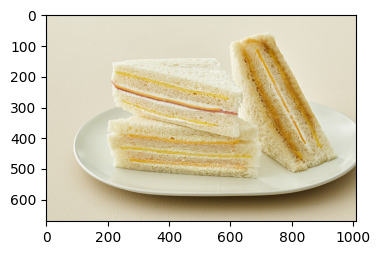

테스트 파일 :  ./image/food_test_sandwich_3.jpg
실제 :  sandwich
예측 :  omelette


<Figure size 400x300 with 0 Axes>

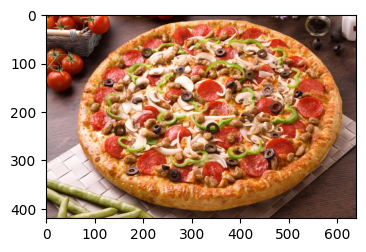

테스트 파일 :  ./image/food_test_pizza_1.jpg
실제 :  pizza
예측 :  pizza


In [65]:
# 예측 결과 출력
for i, p in enumerate(pred_prob):
    plt.figure(figsize=(4,3))
    plt.imshow(mpimg.imread(test_samples[i]))
    plt.show()
    
    y = p.argmax() # 예측 확률 가장 큰 값
    print('테스트 파일 : ', test_samples[i])
    print('실제 : ', test_samples[i].split('/')[2].split('_')[2])
    print('예측 : ', categories[y])